<a href="https://colab.research.google.com/github/392pablo/ciencia-de-datos/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

In [10]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

## Hacemos un head para visualizar el dataframe

In [11]:
### head del dataset
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
#visualizamos los valores unicos de la variable target que es income
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [13]:
## la codificamos a 1 y 0 para no tener categorias redundantes
df['income'] = np.where(
    df['income'].isin(['>50K', '>50K.']),
    1,
    0
)

## Hacemos un analisis de los datos faltantes y limpieza

In [14]:
#### datos faltantes
missing_counts = df.isnull().sum()
print(missing_counts)

#### ahora para ver cuantas filas tienen datos faltantes del dataframe

n_filas_con_na = df.isnull().any(axis=1).sum()
print(f"Filas con datos faltantes: {n_filas_con_na}")

print(n_filas_con_na/len(df)) ### solo el 2.499% de los datos son NA por lo tanto no hay mucho costo por eliminarlos
#### eliminamos NA's
df=df.dropna()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
Filas con datos faltantes: 1221
0.024998976290897177


## Visualizamos las distribuciones de las variables numericas mediante histogramas

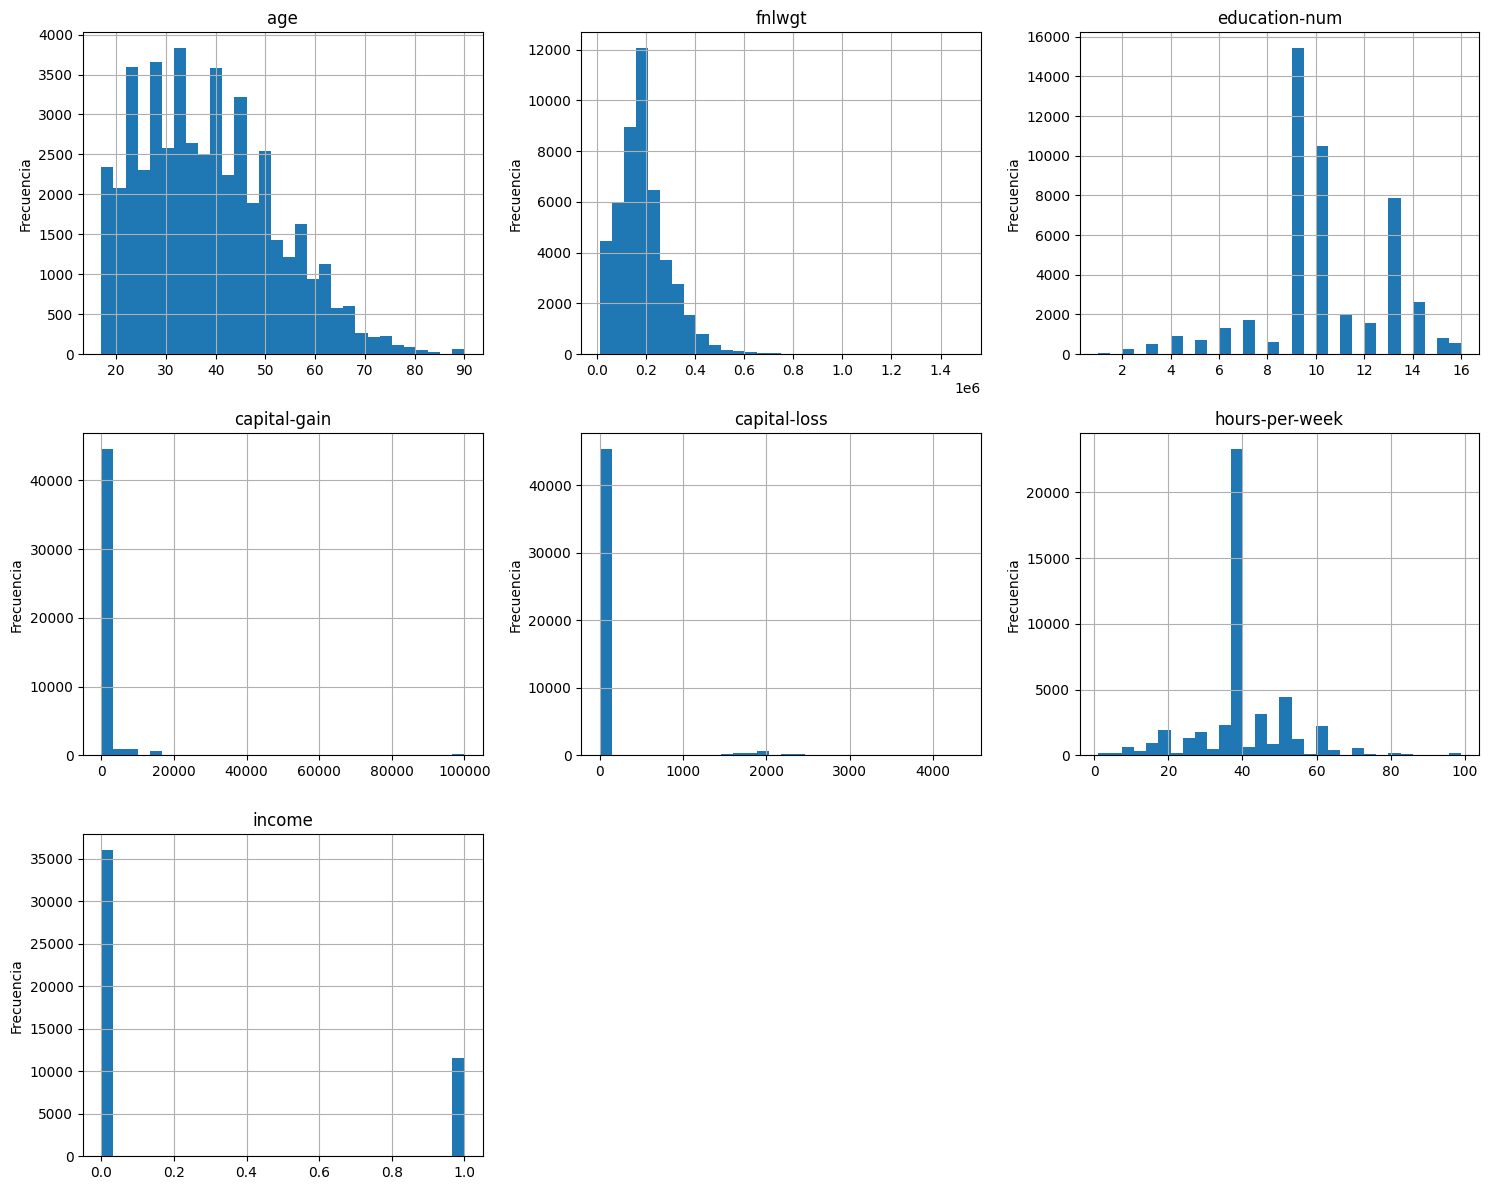

In [15]:
#### histogramas

# seleccionamos columnas numericas
num_cols = df.select_dtypes(include='number').columns.tolist()

# usamos una grilla para los graficos
n = len(num_cols)
ncols = 3  ### usamos 3 columnas para la grilla
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].hist(bins=30, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

for j in range(n, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

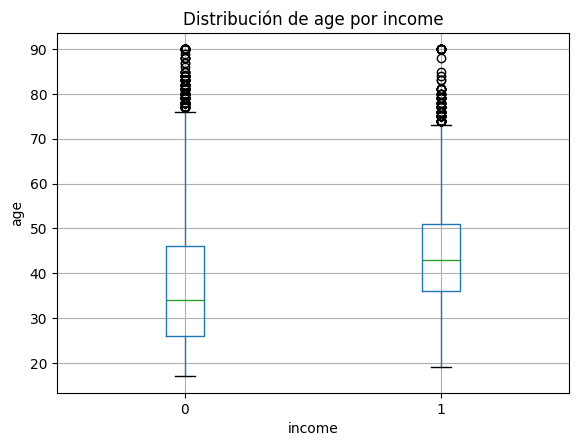

<Figure size 640x480 with 0 Axes>

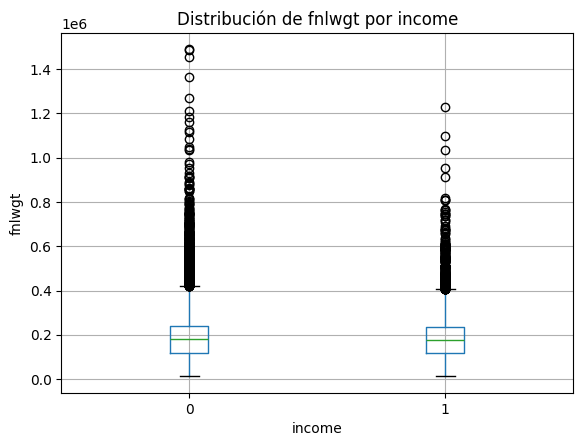

<Figure size 640x480 with 0 Axes>

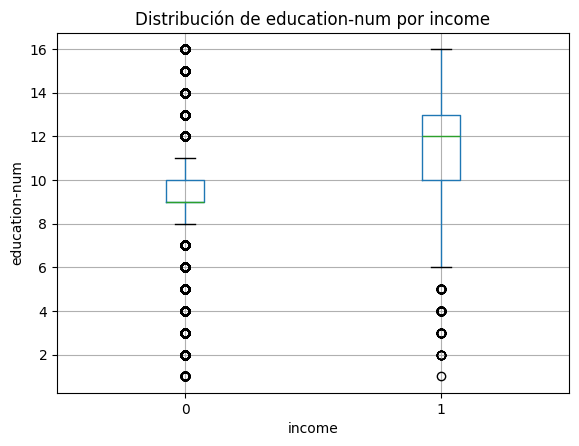

<Figure size 640x480 with 0 Axes>

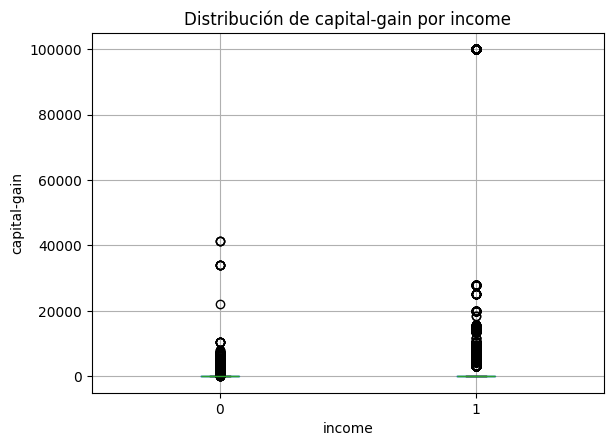

<Figure size 640x480 with 0 Axes>

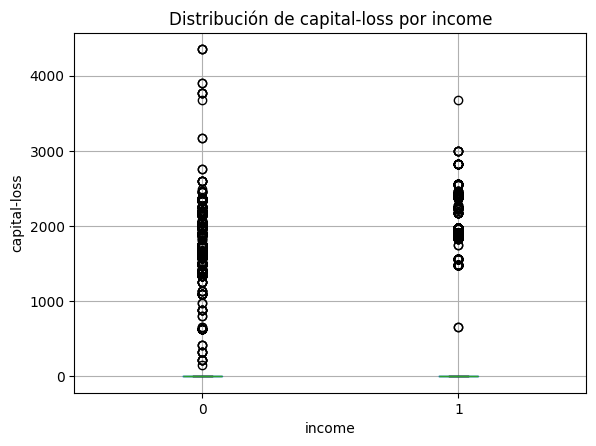

<Figure size 640x480 with 0 Axes>

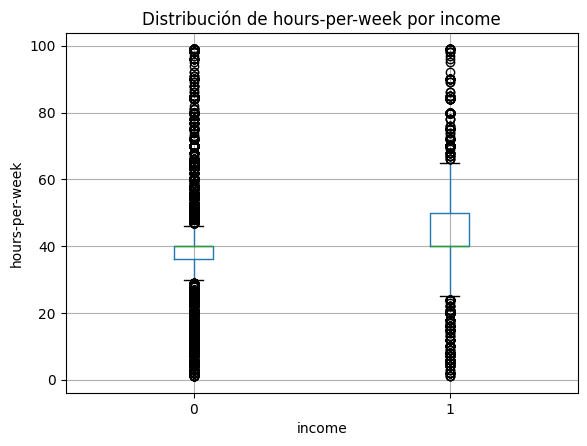

<Figure size 640x480 with 0 Axes>

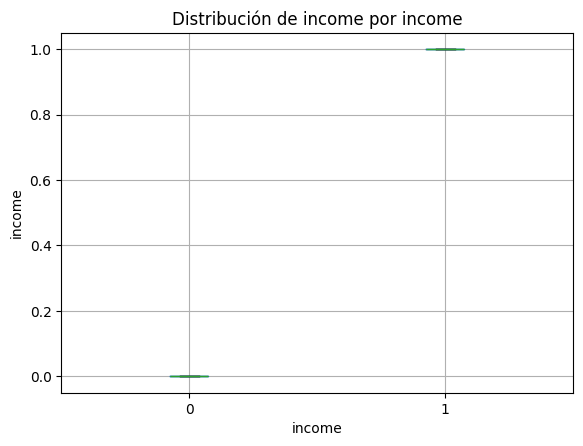

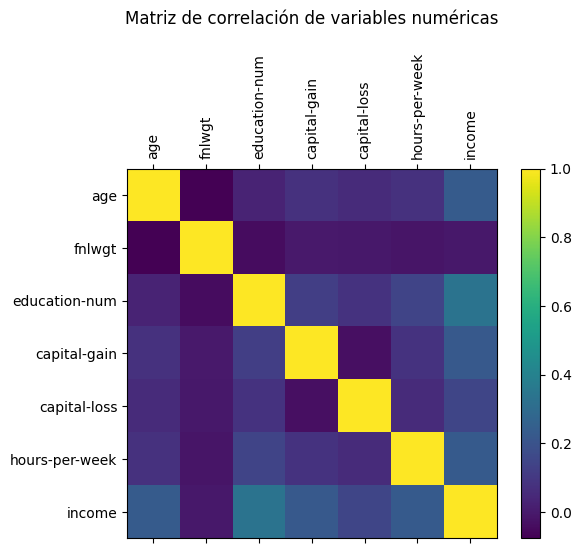

In [16]:
# 1. Seleccionar las columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# 2. Boxplots bivariados: cada variable numérica vs. la variable target 'income'
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by='income')
    plt.title(f'Distribución de {col} por income')
    plt.suptitle('')  # Quita el título automático de pandas
    plt.xlabel('income')
    plt.ylabel(col)
    plt.show()

# 3. Matriz de correlaciones (solo variables numéricas)
corr_matrix = df[numeric_cols].corr()

plt.figure()
plt.matshow(corr_matrix, fignum=0)
plt.title('Matriz de correlación de variables numéricas', pad=20)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.show()

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:29:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7217
           1       0.75      0.63      0.69      2308

    accuracy                           0.86      9525
   macro avg       0.82      0.78      0.80      9525
weighted avg       0.85      0.86      0.86      9525



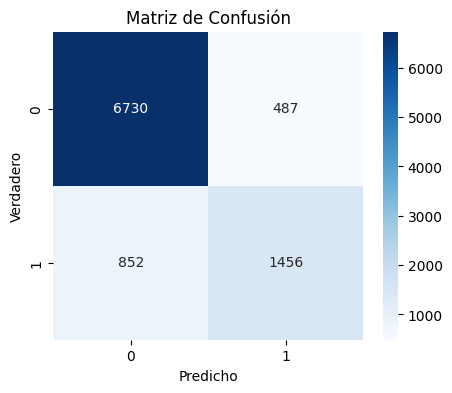

ROC AUC: 0.913


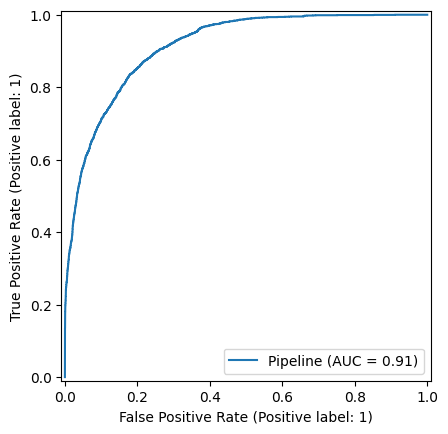

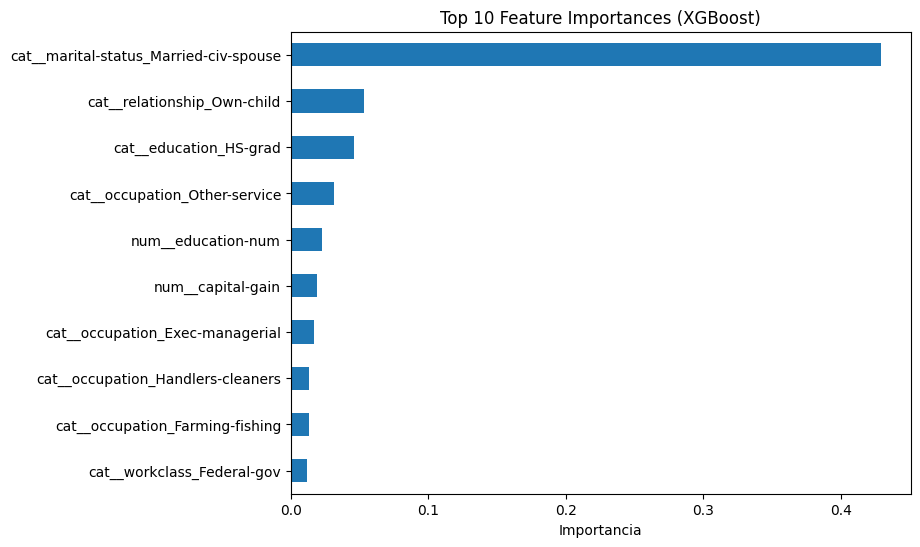

In [18]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
from xgboost import XGBClassifier

# separaramos los datos en X e y
X = df.drop(columns=['income'])
y = df['income'].astype(int)  # Asegurar que el target sea numérico

# identificar las columnas numéricas y categóricas
numeric_features     = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category','bool']).columns.tolist()

numeric_transformer = Pipeline([
    ('scaler',     StandardScaler()),
    ('normalizer', Normalizer())
])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer,     numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# división Train/Test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# fiteamos el modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred  = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Métricas y reportes
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.show()

# ROC AUC
roc_score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_score:.3f}")

# Curva ROC
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

# 9. Importancias de las variables
feature_names = preprocessor.get_feature_names_out()
importances = pipeline.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importancia")
plt.show()


##usamos un modelo Xgboost, ya que es un clasificador bastante bueno que utiliza boosting, en general el modelo tiene una buena precisión, además de un AUC o area bajo la curva bastante alta 0.91. además al analizar la importancia de las variables una de ellas es si su estado marital es casado, seguido de si tiene hijos y si se graduo de la secundaria (High-school graduate).